# Months Seasonality

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "@GC_60min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['DayOfWeek'] = instrument.index.dayofweek
instrument['Week'] = instrument.index.week
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(24)

Il file contiene 68540 record


,Open,High,Low,Close,AvgPrice,OpenClose,OpenClosePerc,DeltaClosePerc,DayOfMonth,DayOfWeek,Week,Month
Date_Time,,,,,,,,,,,,
2007-08-10 00:00:00,826.3,826.8,826.1,826.8,826.50,0.5,0.06,0.06,10,4,32,8
2007-08-10 01:00:00,826.8,826.8,825.9,825.9,826.35,-0.9,-0.11,-0.11,10,4,32,8
2007-08-10 02:00:00,825.9,826.5,825.4,825.7,825.88,-0.2,-0.02,-0.02,10,4,32,8
2007-08-10 03:00:00,825.7,826.8,825.6,826.5,826.15,0.8,0.10,0.10,10,4,32,8
2007-08-10 04:00:00,826.5,827.5,825.6,827.4,826.75,0.9,0.11,0.11,10,4,32,8
2007-08-10 05:00:00,827.5,827.6,826.8,827.2,827.27,-0.3,-0.04,-0.02,10,4,32,8
2007-08-10 06:00:00,827.2,828.3,826.4,826.6,827.12,-0.6,-0.07,-0.07,10,4,32,8
2007-08-10 07:00:00,826.6,826.8,824.5,824.7,825.65,-1.9,-0.23,-0.23,10,4,32,8
2007-08-10 08:00:00,824.8,824.8,820.9,822.0,823.12,-2.8,-0.34,-0.33,10,4,32,8


In [2]:
monthly = instrument.resample('M').mean()
monthly['MonthlyOpenClosePerc'] = instrument.resample('M')['OpenClosePerc'].sum()
monthly['MonthlyDeltaClosePerc'] = instrument.resample('M')['DeltaClosePerc'].sum()
monthly.head(10)

,Open,High,Low,Close,AvgPrice,OpenClose,OpenClosePerc,DeltaClosePerc,DayOfMonth,DayOfWeek,Week,Month,MonthlyOpenClosePerc,MonthlyDeltaClosePerc
Date_Time,,,,,,,,,,,,,,
2007-08-31,825.223416,826.109917,824.352342,825.263085,825.237218,0.039669,0.004793,0.002507,21.198347,2.181818,33.859504,8.0,1.74,0.91
2007-09-30,872.036344,873.127957,871.103441,872.188172,872.114043,0.151828,0.017570,0.017312,15.440860,2.129032,37.473118,9.0,8.17,8.05
2007-10-31,912.200378,913.504159,910.975614,912.291304,912.242873,0.090926,0.009887,0.009849,15.727788,1.945180,41.826087,10.0,5.23,5.21
2007-11-30,960.642945,962.412065,958.816360,960.600409,960.617710,-0.042536,-0.004233,-0.003252,15.840491,2.179959,46.237219,11.0,-2.07,-1.59
2007-12-31,955.439565,956.848913,954.114348,955.525652,955.482065,0.086087,0.009174,0.010913,15.582609,2.113043,48.460870,12.0,4.22,5.02
2008-01-31,1034.835573,1036.774506,1032.999605,1034.987352,1034.899032,0.151779,0.015277,0.017273,16.543478,2.114625,3.061265,1.0,7.73,8.74
2008-02-29,1066.325732,1068.212762,1064.521757,1066.426569,1066.371757,0.100837,0.009498,0.008828,15.707113,2.158996,7.364017,2.0,4.54,4.22
2008-03-31,1105.931613,1108.200215,1103.371828,1105.793333,1105.824301,-0.138280,-0.012215,-0.010710,15.946237,1.941935,11.572043,3.0,-5.68,-4.98
2008-04-30,1047.451779,1049.316403,1045.352372,1047.359881,1047.369960,-0.091897,-0.008340,-0.007905,15.397233,2.033597,15.909091,4.0,-4.22,-4.00


In [3]:
monthly['MonthlyOpenClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    133.000000
mean       0.214361
std        4.941011
min      -16.340000
10%       -5.688000
20%       -3.610000
30%       -2.096000
40%       -1.086000
50%       -0.040000
60%        1.354000
70%        2.894000
80%        4.488000
90%        6.330000
max       11.010000
Name: MonthlyOpenClosePerc, dtype: float64

In [4]:
monthly['MonthlyDeltaClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    133.000000
mean       0.409098
std        4.955501
min      -16.090000
10%       -5.744000
20%       -3.250000
30%       -2.092000
40%       -0.902000
50%        0.310000
60%        1.362000
70%        3.160000
80%        4.818000
90%        6.246000
max       12.130000
Name: MonthlyDeltaClosePerc, dtype: float64

In [5]:
biasMonthlyIntraday = []
biasMonthlyOverNight = []
months = []

for month in range(1,13):
    months.append(month)

print(months)

for month in months:
    biasMonthlyIntraday.append(monthly[(monthly['Month']==month)]['MonthlyOpenClosePerc'].mean())
    biasMonthlyOverNight.append(monthly[(monthly['Month']==month)]['MonthlyDeltaClosePerc'].mean())

print("")
print("Intraday:")
print(len(biasMonthlyIntraday))
print(biasMonthlyIntraday)
print("")
print("OverNight:")
print(len(biasMonthlyOverNight))
print(biasMonthlyOverNight)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Intraday:
12
[3.3836363636363624, 1.74818181818182, -1.4936363636363632, -0.11636363636363732, -1.1190909090909076, -0.38090909090909153, 0.10818181818181906, 1.6549999999999985, 0.04636363636363582, -0.6109090909090902, -0.1181818181818176, -0.6609090909090926]

OverNight:
12
[3.574545454545455, 1.7709090909090923, -1.1563636363636354, 0.30363636363636476, -0.9081818181818186, -0.21545454545454656, 0.14090909090909093, 1.9699999999999989, 0.08181818181818076, -0.4627272727272724, 0.15727272727272823, -0.4890909090909082]


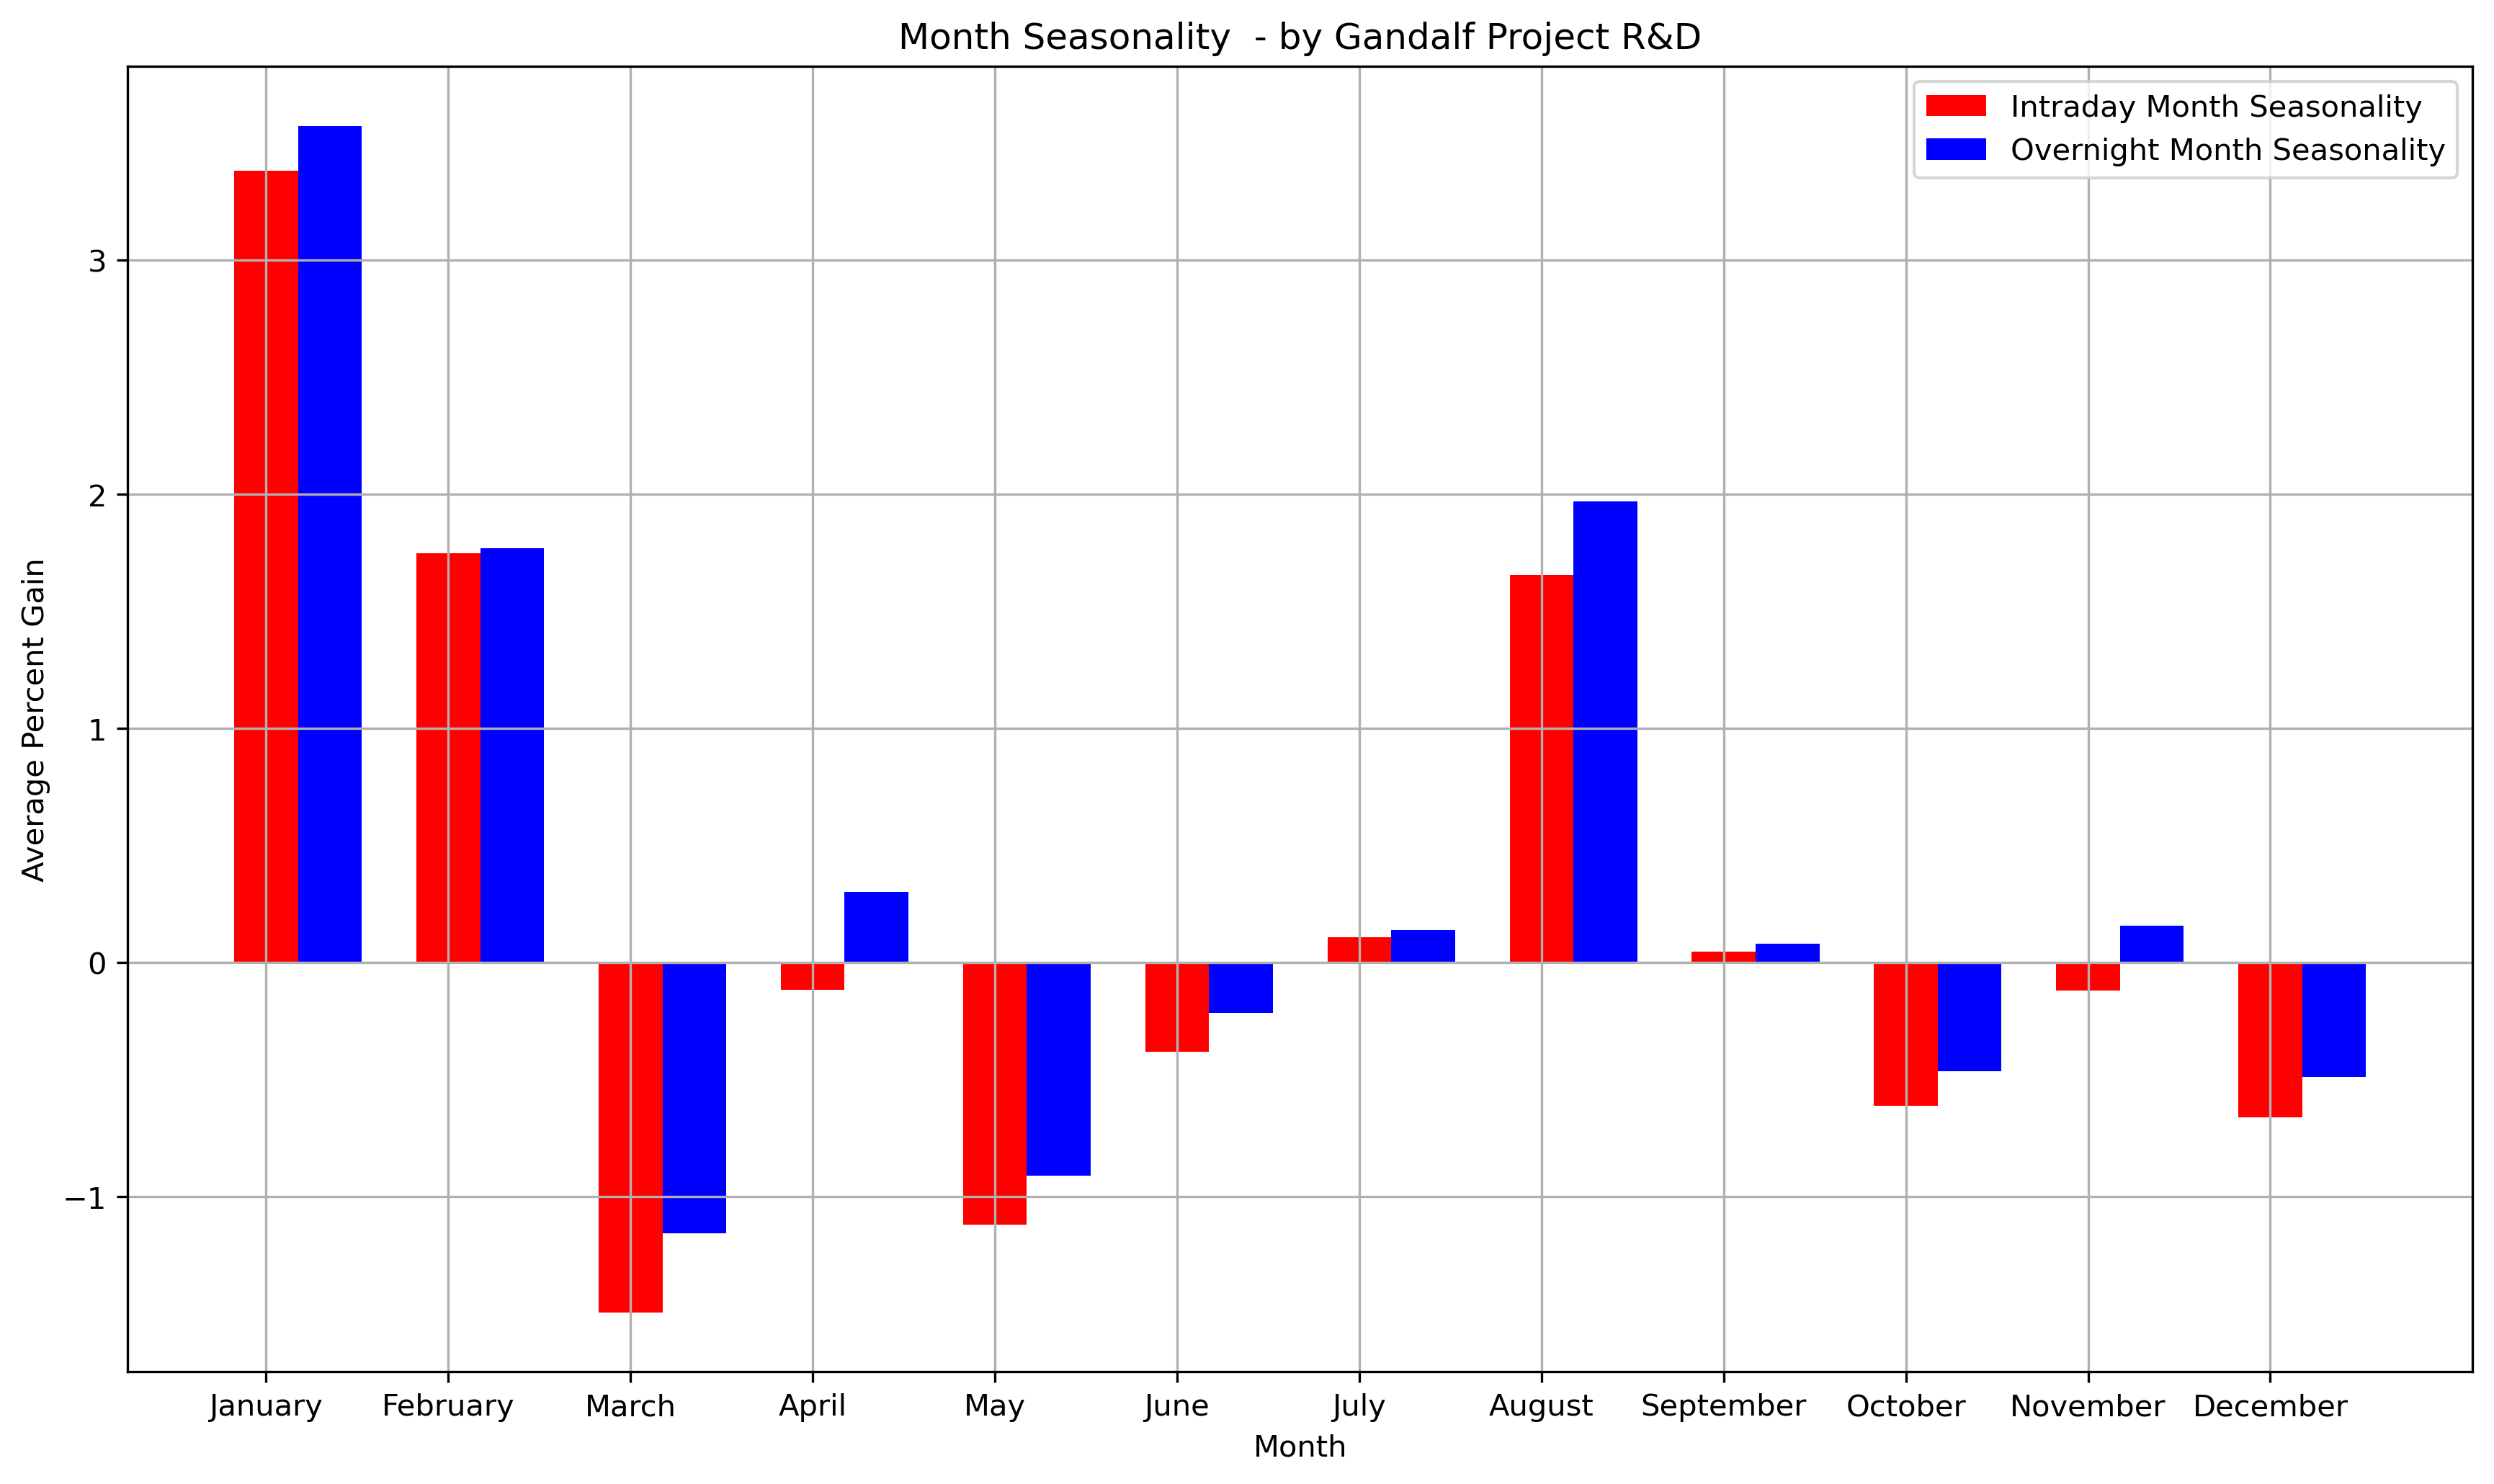

In [6]:
# ************** MODULO GRAFICO **********************************************************************************
n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasMonthlyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Month Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasMonthlyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Month Seasonality')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Month Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["January",
                     "February",
                     "March",
                     "April",
                     "May",
                     "June",
                     "July",
                     "August",
                     "September",
                     "October",
                     "November",
                     "December"]))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

# Unendo i pezzi:

Il file contiene 68540 record
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Intraday:
12
[3.3836363636363624, 1.74818181818182, -1.4936363636363632, -0.11636363636363732, -1.1190909090909076, -0.38090909090909153, 0.10818181818181906, 1.6549999999999985, 0.04636363636363582, -0.6109090909090902, -0.1181818181818176, -0.6609090909090926]

OverNight:
12
[3.574545454545455, 1.7709090909090923, -1.1563636363636354, 0.30363636363636476, -0.9081818181818186, -0.21545454545454656, 0.14090909090909093, 1.9699999999999989, 0.08181818181818076, -0.4627272727272724, 0.15727272727272823, -0.4890909090909082]


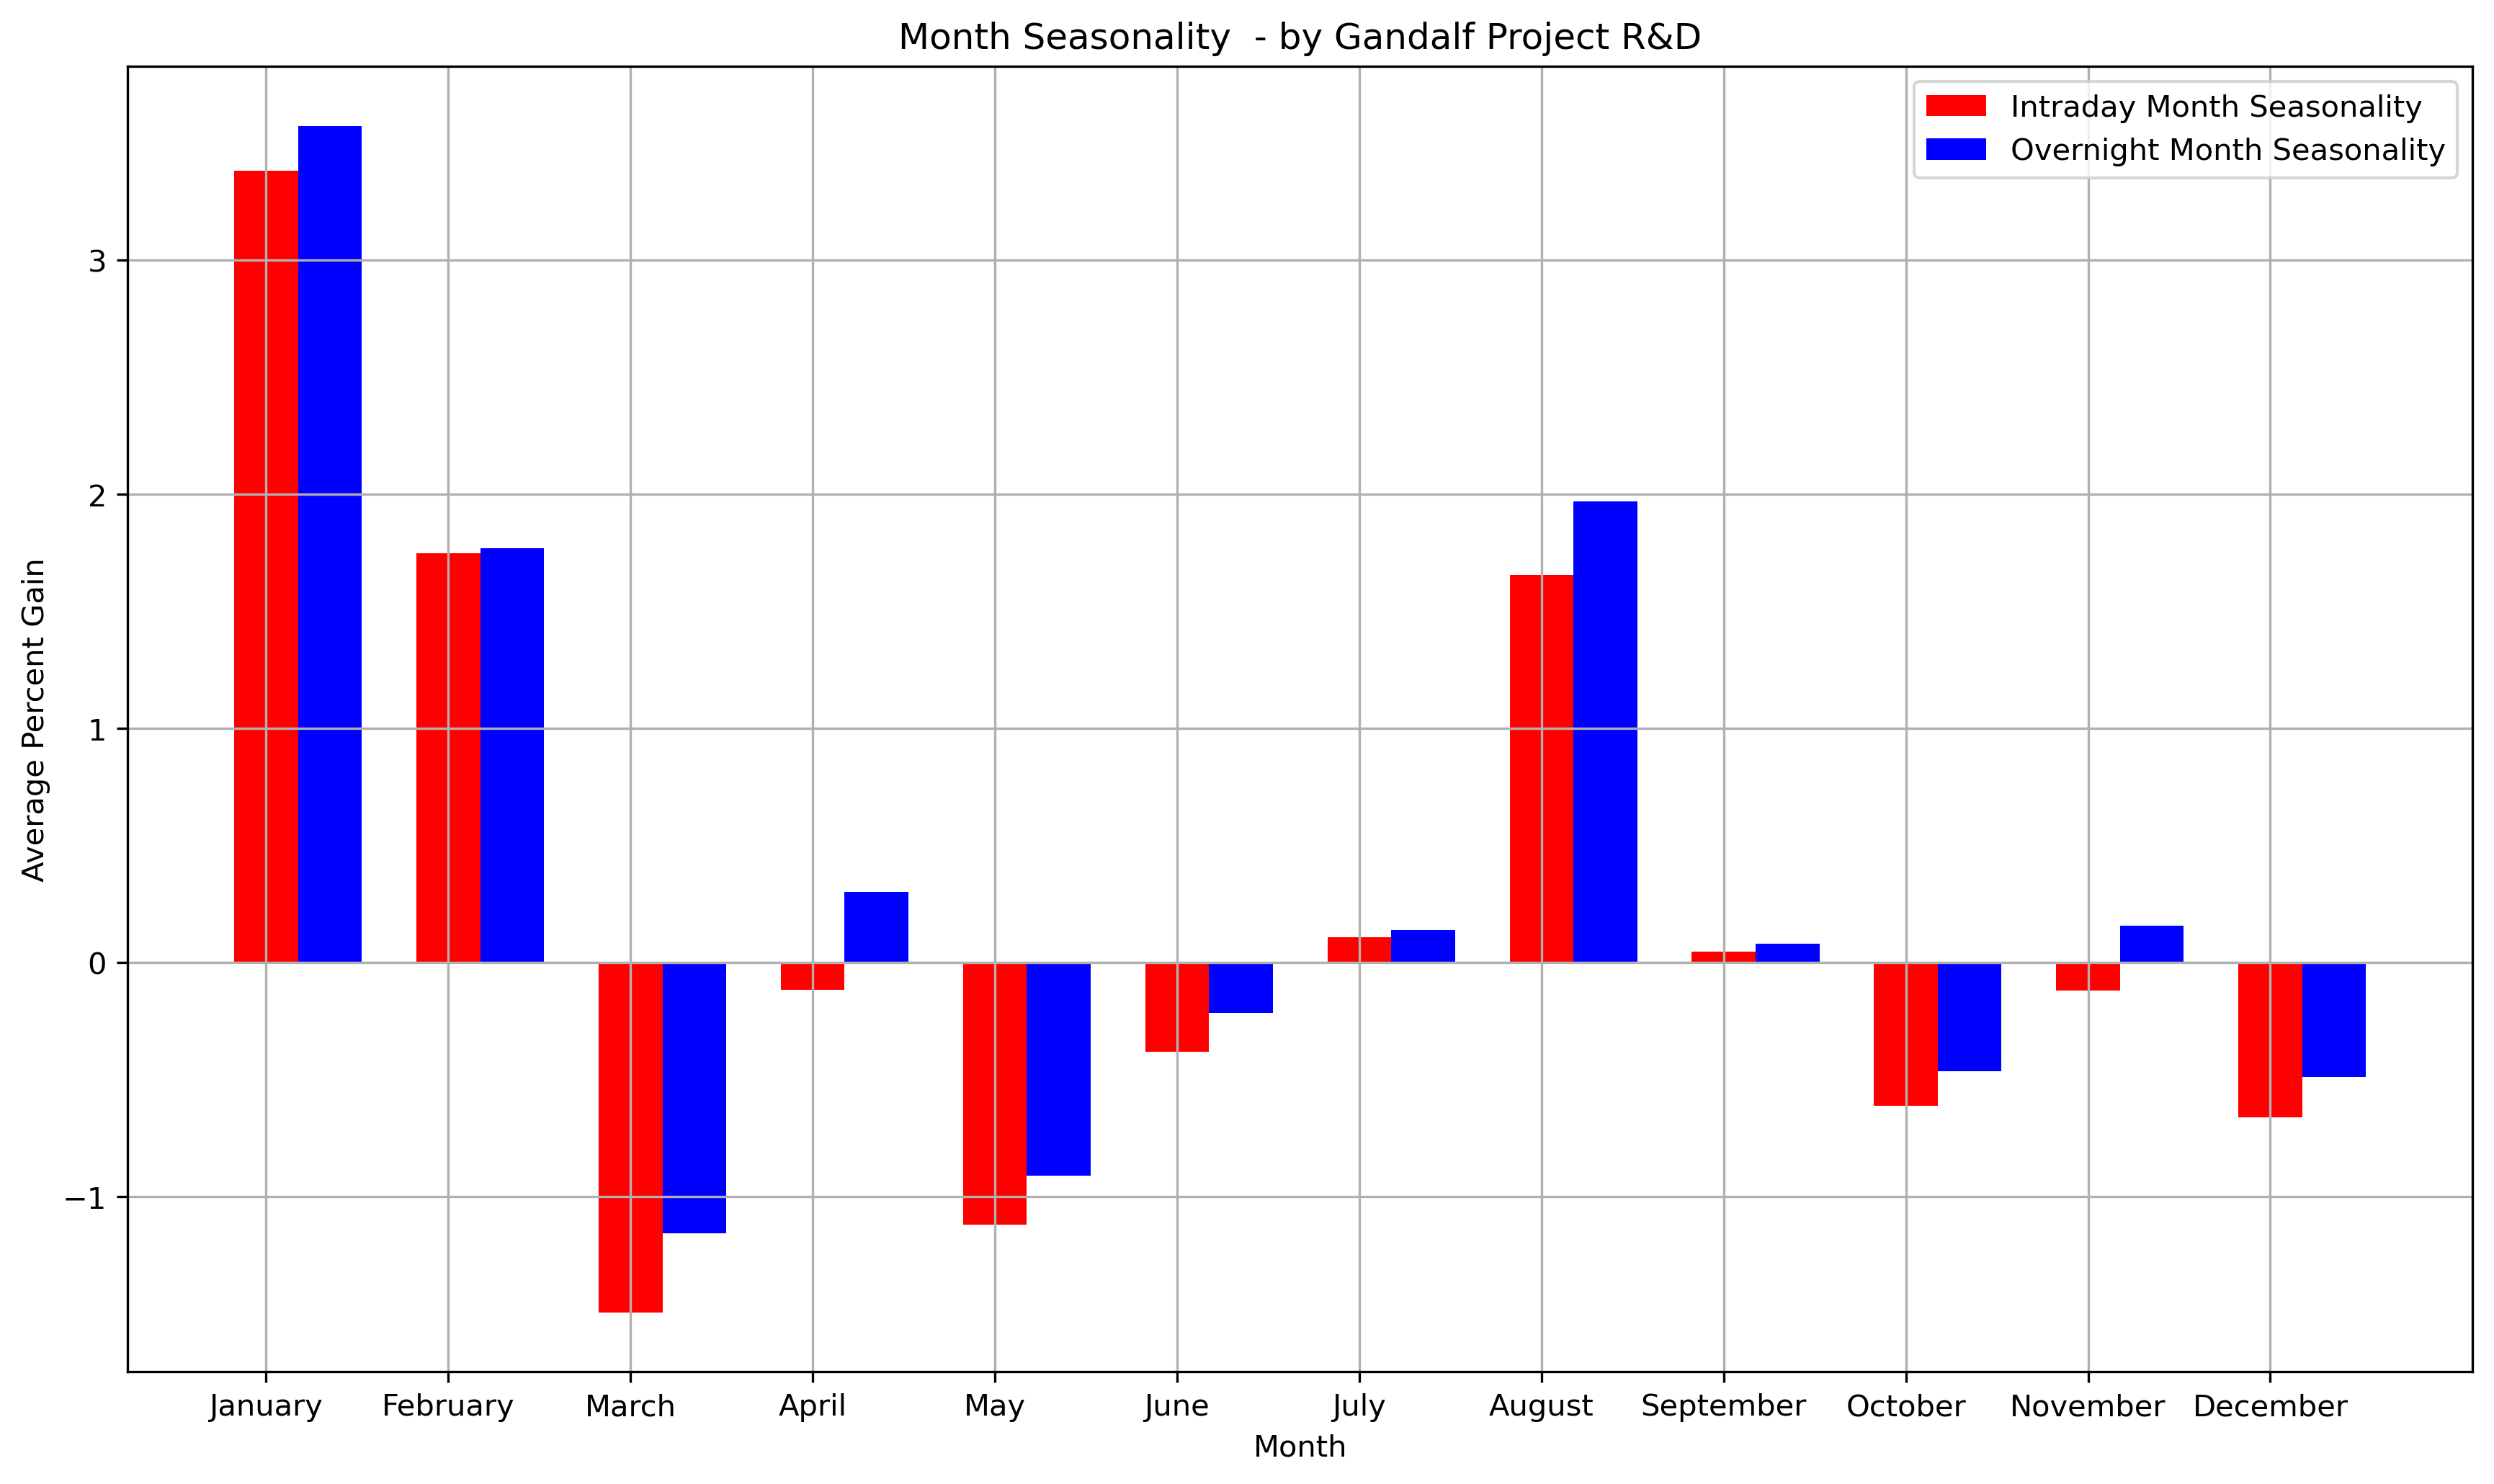

In [7]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "@GC_60min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['DayOfWeek'] = instrument.index.dayofweek
instrument['Week'] = instrument.index.week
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(24)

monthly = instrument.resample('M').mean()
monthly['MonthlyOpenClosePerc'] = instrument.resample('M')['OpenClosePerc'].sum()
monthly['MonthlyDeltaClosePerc'] = instrument.resample('M')['DeltaClosePerc'].sum()
monthly.head(10)

monthly['MonthlyOpenClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

monthly['MonthlyDeltaClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

biasMonthlyIntraday = []
biasMonthlyOverNight = []
months = []

for month in range(1,13):
    months.append(month)

print(months)

for month in months:
    biasMonthlyIntraday.append(monthly[(monthly['Month']==month)]['MonthlyOpenClosePerc'].mean())
    biasMonthlyOverNight.append(monthly[(monthly['Month']==month)]['MonthlyDeltaClosePerc'].mean())

print("")
print("Intraday:")
print(len(biasMonthlyIntraday))
print(biasMonthlyIntraday)
print("")
print("OverNight:")
print(len(biasMonthlyOverNight))
print(biasMonthlyOverNight)

# ************** MODULO GRAFICO **********************************************************************************
n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasMonthlyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Month Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasMonthlyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Month Seasonality')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Month Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["January",
                     "February",
                     "March",
                     "April",
                     "May",
                     "June",
                     "July",
                     "August",
                     "September",
                     "October",
                     "November",
                     "December"]))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

# Percentuale occorrenze positive e negative

In [8]:
def percPosNeg(array, soglia):
    """
    Funzione che restituisce le percentuali di valori 
    maggiori e minori di una soglia
    """
    if len(array) == 0:
        return 0,0
    contapos = 0
    contaneg = 0
    for el in array:
        if el > soglia:
            contapos+=1
        if el <= soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2), round(contaneg/len(array)*100,2)

Month_Intraday_Statistics = []
Month_OverNight_Statistics = []

months_names = ["January",
                "February",
                "March",
                "April",
                "May",
                "June",
                "July",
                "August",
                "September",
                "October",
                "November",
                "December"]

for month in months:

    intraday = monthly[(monthly['Month']==month)]['MonthlyOpenClosePerc'].dropna()
    Month_Intraday_Statistics.append(percPosNeg(intraday,0))
    
    overnight = monthly[(monthly['Month']==month)]['MonthlyDeltaClosePerc'].dropna()
    Month_OverNight_Statistics.append(percPosNeg(overnight,0))

print("Statistics Intraday:")
for el in range(len(Month_Intraday_Statistics)):
    if biasMonthlyIntraday[el] > 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][0], "%")
    if biasMonthlyIntraday[el] <= 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][1], "%")
        
print("")
print("Statistics Overnight:")
for el in range(len(Month_OverNight_Statistics)):
    if biasMonthlyOverNight[el] > 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][0], "%")
    if biasMonthlyOverNight[el] <= 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][1], "%")

Statistics Intraday:
January 3.3836 72.73 %
February 1.7482 63.64 %
March -1.4936 72.73 %
April -0.1164 54.55 %
May -1.1191 72.73 %
June -0.3809 54.55 %
July 0.1082 54.55 %
August 1.655 66.67 %
September 0.0464 54.55 %
October -0.6109 54.55 %
November -0.1182 63.64 %
December -0.6609 54.55 %

Statistics Overnight:
January 3.5745 72.73 %
February 1.7709 63.64 %
March -1.1564 63.64 %
April 0.3036 45.45 %
May -0.9082 54.55 %
June -0.2155 54.55 %
July 0.1409 54.55 %
August 1.97 66.67 %
September 0.0818 54.55 %
October -0.4627 54.55 %
November 0.1573 45.45 %
December -0.4891 54.55 %


# Codice Completo #1

Il file contiene 68394 record

Statistiche Intraday:
count    133.000000
mean      -0.335489
std        6.706989
min      -29.000000
10%       -7.478000
20%       -5.062000
30%       -2.890000
40%       -1.618000
50%       -0.120000
60%        1.384000
70%        2.342000
80%        4.678000
90%        6.630000
max       15.600000
Name: MonthlyOpenClosePerc, dtype: float64

Statistiche OverNight:
count    133.000000
mean       0.004361
std        7.049461
min      -32.900000
10%       -7.254000
20%       -4.814000
30%       -3.232000
40%       -1.376000
50%        0.600000
60%        1.986000
70%        3.352000
80%        5.252000
90%        7.436000
max       16.870000
Name: MonthlyDeltaClosePerc, dtype: float64
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Statistics Intraday:
January -0.5273 54.55 %
February 2.5418 63.64 %
March -0.1309 63.64 %
April 0.3191 54.55 %
May -3.1518 63.64 %
June 0.4973 63.64 %
July 1.6327 63.64 %
August -0.6742 58.33 %
September -2.2491 45.45 %
October -1.229

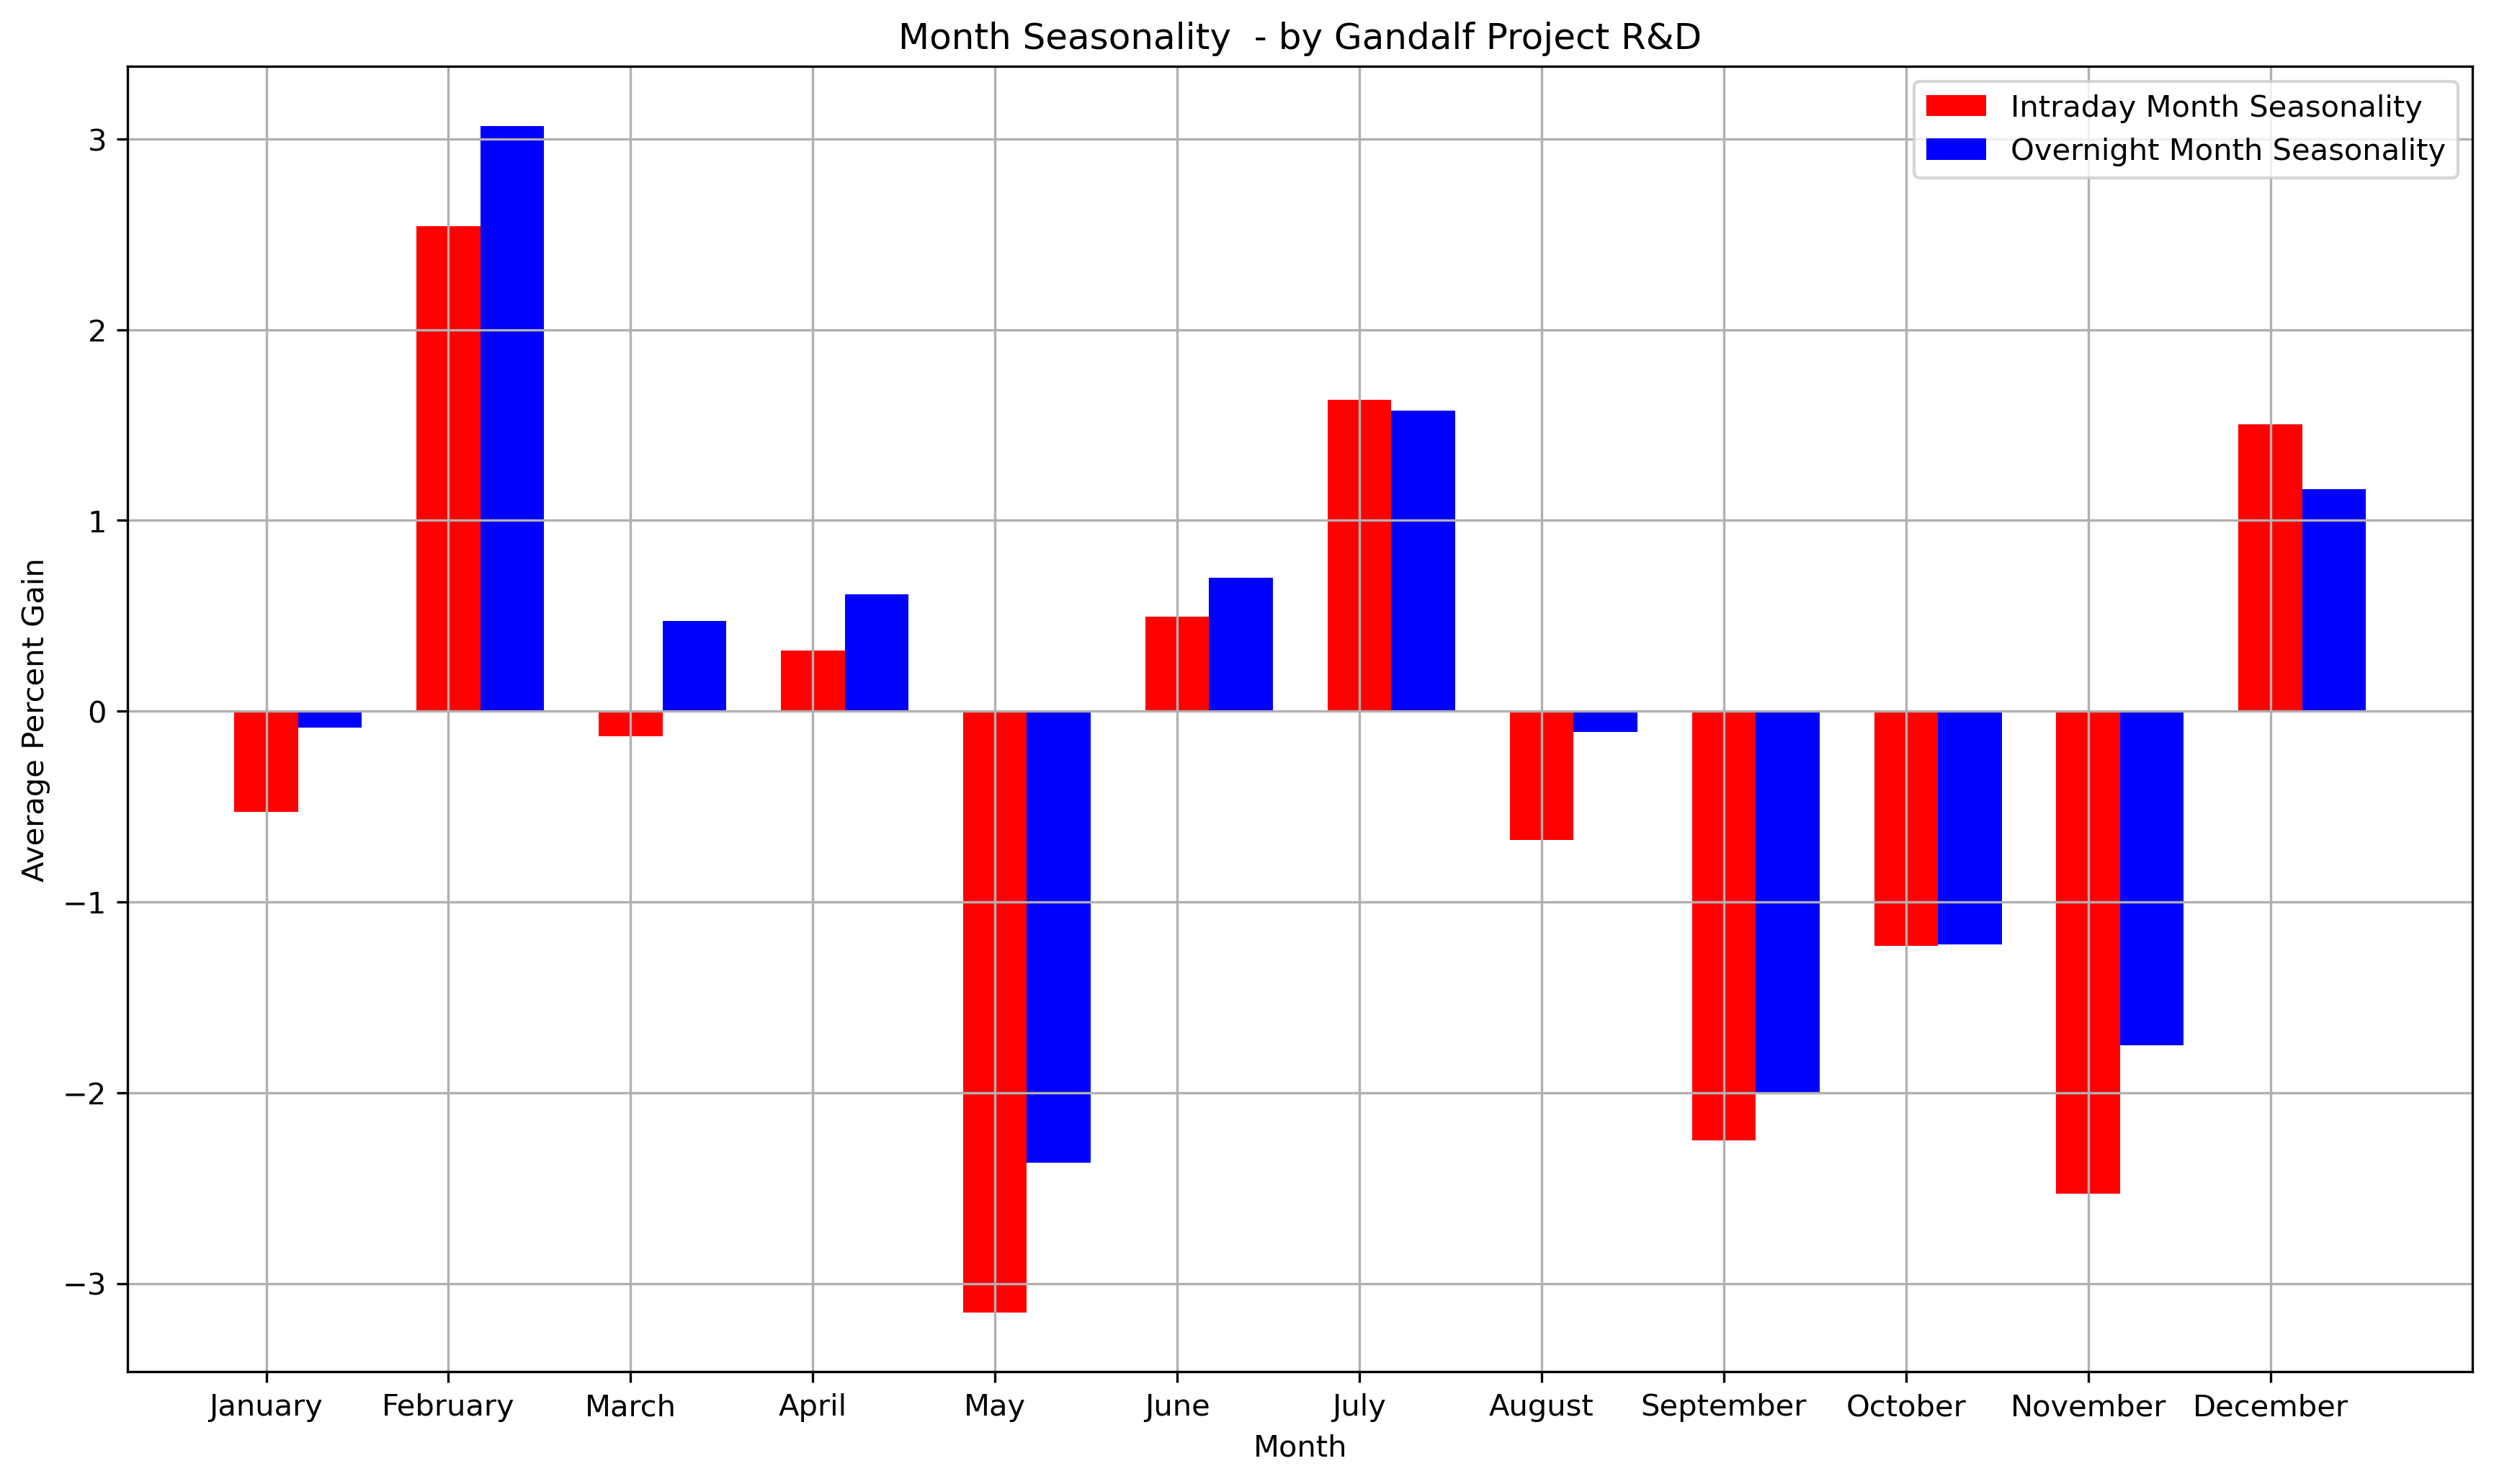

In [9]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def percPosNeg(array, soglia):
    """
    Funzione che restituisce le percentuali di valori 
    maggiori e minori di una soglia
    """
    if len(array) == 0:
        return 0,0
    contapos = 0
    contaneg = 0
    for el in array:
        if el > soglia:
            contapos+=1
        if el <= soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2), round(contaneg/len(array)*100,2)

filename = "@HG_60min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['DayOfWeek'] = instrument.index.dayofweek
instrument['Week'] = instrument.index.week
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(24)

monthly = instrument.resample('M').mean()
monthly['MonthlyOpenClosePerc'] = instrument.resample('M')['OpenClosePerc'].sum()
monthly['MonthlyDeltaClosePerc'] = instrument.resample('M')['DeltaClosePerc'].sum()
monthly.head(10)

print("")
print("Statistiche Intraday:")
print(monthly['MonthlyOpenClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]))
print("")
print("Statistiche OverNight:")
print(monthly['MonthlyDeltaClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]))

biasMonthlyIntraday = []
biasMonthlyOverNight = []
months = []

for month in range(1,13):
    months.append(month)

print(months)

for month in months:
    biasMonthlyIntraday.append(monthly[(monthly['Month']==month)]['MonthlyOpenClosePerc'].mean())
    biasMonthlyOverNight.append(monthly[(monthly['Month']==month)]['MonthlyDeltaClosePerc'].mean())

#print("")
#print("Intraday:")
#print(len(biasMonthlyIntraday))
#print(biasMonthlyIntraday)
#print("")
#print("OverNight:")
#print(len(biasMonthlyOverNight))
#print(biasMonthlyOverNight)

Month_Intraday_Statistics = []
Month_OverNight_Statistics = []

months_names = ["January",
                "February",
                "March",
                "April",
                "May",
                "June",
                "July",
                "August",
                "September",
                "October",
                "November",
                "December"]

for month in months:

    intraday = monthly[(monthly['Month']==month)]['MonthlyOpenClosePerc'].dropna()
    Month_Intraday_Statistics.append(percPosNeg(intraday,0))
    
    overnight = monthly[(monthly['Month']==month)]['MonthlyDeltaClosePerc'].dropna()
    Month_OverNight_Statistics.append(percPosNeg(overnight,0))

print("")
print("Statistics Intraday:")
for el in range(len(Month_Intraday_Statistics)):
    if biasMonthlyIntraday[el] > 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][0], "%")
    if biasMonthlyIntraday[el] <= 0:
        print(months_names[el], round(biasMonthlyIntraday[el],4), Month_Intraday_Statistics[el][1], "%")
        
print("")
print("Statistics Overnight:")
for el in range(len(Month_OverNight_Statistics)):
    if biasMonthlyOverNight[el] > 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][0], "%")
    if biasMonthlyOverNight[el] <= 0:
        print(months_names[el], round(biasMonthlyOverNight[el],4), Month_OverNight_Statistics[el][1], "%")

# ************** MODULO GRAFICO **********************************************************************************
n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasMonthlyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Month Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasMonthlyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Month Seasonality')

ax.set_xlabel('Month')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Month Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["January",
                     "February",
                     "March",
                     "April",
                     "May",
                     "June",
                     "July",
                     "August",
                     "September",
                     "October",
                     "November",
                     "December"]))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************